In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings 
warnings.filterwarnings('ignore')

## Import Data

In [7]:
df=pd.read_csv('taxi.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18919 entries, 0 to 18918
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        18919 non-null  float64
 1   pickup_datetime    18919 non-null  object 
 2   pickup_longitude   18919 non-null  float64
 3   pickup_latitude    18919 non-null  float64
 4   dropoff_longitude  18919 non-null  float64
 5   dropoff_latitude   18919 non-null  float64
 6   passenger_count    18918 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.0+ MB


## Handling missing value

In [9]:
df.dropna(inplace=True)

In [10]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

## Data types conversion

In [11]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [12]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

## Data Describe

In [13]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000
mean,11.289221,-72.486834,39.925272,-72.498734,39.913116,1.657205
std,9.551667,10.503808,6.715228,10.461670,6.160671,1.282236
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992223,40.734687,-73.991233,40.734589,1.000000
50%,8.500000,-73.981758,40.752620,-73.980234,40.753566,1.000000
75%,12.500000,-73.966788,40.767427,-73.963834,40.768067,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


## Data Preparation

### Adding Features - Features Extraction
- Jarak (simplify)
- Jam (jam pulang dan berangkat kerja)
- Hari (Hari kerja atau hari libur)
- Lokasi
- Tahun
- Jumlah penumpang

### Features Extraction - Datetime Extract

In [14]:
pickup_dt = df['pickup_datetime'].dt

In [15]:
df['year']=pickup_dt.year
df['month']=pickup_dt.month
df['day']=pickup_dt.day
df['hour']=pickup_dt.hour

In [16]:
df.drop(columns='pickup_datetime', inplace=True)

### Feature Extraction - Membuat Features Jarak - Simplify

In [17]:

df['distance']=abs((df['pickup_longitude']-df['dropoff_longitude'])+(df['pickup_latitude']-df['dropoff_latitude']))

In [18]:
df.drop(columns=['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude'], inplace=True)

In [19]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,15,17,0.006340
1,16.9,1.0,2010,1,5,16,0.107481
2,5.7,2.0,2011,8,18,0,0.019212
3,7.7,1.0,2012,4,21,4,0.020512
4,5.3,1.0,2010,3,9,7,0.027194


## Machine learning modelling

### Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=df.drop(columns='fare_amount')
y=df['fare_amount']

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.15,random_state=42)

In [23]:
x_train.shape

(16080, 6)

In [24]:
x_test.shape

(2838, 6)

In [25]:
x_train.head()

,passenger_count,year,month,day,hour,distance
2760,3.0,2014,11,5,0,0.038267
13436,1.0,2015,1,8,11,0.076557
5746,1.0,2011,10,2,10,0.016469
5998,1.0,2014,12,21,22,0.062633
6896,6.0,2014,9,3,17,0.018300


In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Model Training

#### Base Model

In [27]:
model_LR=LinearRegression(fit_intercept=False)

In [28]:
model_LR.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [29]:
def Eva_Matrix(Model,x,y_true):
    y_pred=Model.predict(x)
    R2=r2_score(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    MSE=mean_squared_error(y_true,y_pred)
    RMSE=np.sqrt(MSE)
    return R2,MAE,MSE,RMSE

In [30]:
# Training
r2_LR_tr,MAE_LR_tr, MSE_LR_tr,RMSE_LR_tr=Eva_Matrix(model_LR,x_train,y_train)

In [31]:
# Testing
r2_LR_ts,MAE_LR_ts, MSE_LR_ts,RMSE_LR_ts=Eva_Matrix(model_LR,x_test,y_test)

In [32]:
eva_data={
    'LinearReg Training':[r2_LR_tr,MAE_LR_tr,MSE_LR_tr,RMSE_LR_tr],
    'LenarReg Test':[r2_LR_ts,MAE_LR_ts,MSE_LR_ts,RMSE_LR_ts]
}
pd.DataFrame(eva_data,index=['R2','MAE','MSE','RMSE'])

,LinearReg Training,LenarReg Test
R2,0.002133,0.003077
MAE,6.012494,5.744713
MSE,92.126114,84.686428
RMSE,9.598235,9.202523


#### Ridge

In [33]:
model_R=Ridge()

In [34]:
model_R.fit(x_train,y_train)

Ridge()

#### Elastic Net

In [35]:
model_E=ElasticNet()

In [36]:
model_E.fit(x_train,y_train)

ElasticNet()

In [37]:
def Eva_Matrix_DF(Model,x_train,x_test,y_train,y_test, Nama):
    y_pred_tr=Model.predict(x_train)
    R2_train=r2_score(y_train,y_pred_tr)
    MAE_train=mean_absolute_error(y_train,y_pred_tr)
    MSE_train=mean_squared_error(y_train,y_pred_tr)
    RMSE_train=np.sqrt(MSE_train)
    y_pred_ts=Model.predict(x_test)
    R2_test=r2_score(y_test,y_pred_ts)
    MAE_test=mean_absolute_error(y_test,y_pred_ts)
    MSE_test=mean_squared_error(y_test,y_pred_ts)
    RMSE_test=np.sqrt(MSE_test)
    eva_data={
    'Training'+Nama:[R2_train, MAE_train, MSE_train,RMSE_train],
    'Test'+Nama:[R2_test,MAE_test,MSE_test,RMSE_test]
}

    df=pd.DataFrame(eva_data,index=['R2','MAE','MSE','RMSE'])
    return df

In [38]:
df_Ridge=Eva_Matrix_DF(model_R,x_train,x_test,y_train,y_test, 'Ridge')

In [39]:
df_Ridge

,TrainingRidge,TestRidge
R2,0.016011,0.017165
MAE,5.942780,5.678294
MSE,90.844816,83.489652
RMSE,9.531255,9.137267


In [40]:
df_Enet=Eva_Matrix_DF(model_E,x_train,x_test,y_train,y_test, 'Enet')

In [41]:
df_Enet

,TrainingEnet,TestEnet
R2,0.013784,0.014032
MAE,5.956253,5.689524
MSE,91.050468,83.755871
RMSE,9.542037,9.151823


#### Lasso

In [42]:
def Eva_Matrix_Base(model,x_train,x_test,y_train,y_test, Nama):
    Model=model.fit(x_train,y_train)
    y_pred_tr=Model.predict(x_train)
    R2_train=r2_score(y_train,y_pred_tr)
    MAE_train=mean_absolute_error(y_train,y_pred_tr)
    MSE_train=mean_squared_error(y_train,y_pred_tr)
    RMSE_train=np.sqrt(MSE_train)
    y_pred_ts=Model.predict(x_test)
    R2_test=r2_score(y_test,y_pred_ts)
    MAE_test=mean_absolute_error(y_test,y_pred_ts)
    MSE_test=mean_squared_error(y_test,y_pred_ts)
    RMSE_test=np.sqrt(MSE_test)
    eva_data={
    'Training'+Nama:[R2_train, MAE_train, MSE_train,RMSE_train],
    'Test'+Nama:[R2_test,MAE_test,MSE_test,RMSE_test]
}

    df=pd.DataFrame(eva_data,index=['R2','MAE','MSE','RMSE'])
    return Model,df

In [43]:
model_L, df_Lasso=Eva_Matrix_Base(Lasso(),x_train,x_test,y_train,y_test, 'Lasso')

In [44]:
df_Lasso

,TrainingLasso,TestLasso
R2,0.011047,0.009871
MAE,5.970088,5.703573
MSE,91.303112,84.109328
RMSE,9.555266,9.171114


In [45]:
df_LinReg=Eva_Matrix_DF(model_LR,x_train,x_test,y_train,y_test,'LinReg')

In [46]:
df_LinReg

,TrainingLinReg,TestLinReg
R2,0.002133,0.003077
MAE,6.012494,5.744713
MSE,92.126114,84.686428
RMSE,9.598235,9.202523


## Evaluation Matrix

In [47]:
## Evaluation Matrix Comparison
pd.concat([df_LinReg,df_Ridge,df_Lasso,df_Enet],axis=1).T

,R2,MAE,MSE,RMSE
TrainingLinReg,0.002133,6.012494,92.126114,9.598235
TestLinReg,0.003077,5.744713,84.686428,9.202523
TrainingRidge,0.016011,5.942780,90.844816,9.531255
TestRidge,0.017165,5.678294,83.489652,9.137267
TrainingLasso,0.011047,5.970088,91.303112,9.555266
TestLasso,0.009871,5.703573,84.109328,9.171114
TrainingEnet,0.013784,5.956253,91.050468,9.542037
TestEnet,0.014032,5.689524,83.755871,9.151823


## ML Improvement 1
- Using Feature Engineering (Polynomial - Power Transformer)

In [48]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [49]:
poly=PolynomialFeatures(degree=3, include_bias=False)

In [50]:
## Power Transformer
yeo_pow=PowerTransformer('yeo-johnson')

In [51]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,15,17,0.006340
1,16.9,1.0,2010,1,5,16,0.107481
2,5.7,2.0,2011,8,18,0,0.019212
3,7.7,1.0,2012,4,21,4,0.020512
4,5.3,1.0,2010,3,9,7,0.027194


In [52]:
num_col=df[['passenger_count','distance','year']]

In [53]:
num_poly=poly.fit_transform(num_col)

In [54]:
num_pow=yeo_pow.fit_transform(num_poly)

In [55]:
num_pow

array([[-5.41041960e-01, -1.05323617e+00, -1.93067784e-13, ...,
        -1.18486758e+00, -7.17413724e-01,  4.22772928e-13],
       [-5.41041960e-01,  1.87884638e+00, -1.27398092e-13, ...,
         1.66386404e+00,  1.21254575e+00,  4.26325641e-13],
       [ 9.14193759e-01, -3.77609129e-01, -6.18394225e-14, ...,
        -3.82918519e-01, -7.30113075e-02,  4.29878355e-13],
       ...,
       [-5.41041960e-01, -6.25738617e-01,  1.33948408e-13, ...,
        -7.19249312e-01, -2.60688471e-01,  4.40314452e-13],
       [-5.41041960e-01, -1.07303399e+00,  1.99007477e-13, ...,
        -1.19943643e+00, -7.43065590e-01,  4.43867165e-13],
       [-5.41041960e-01, -3.22180680e-01, -6.18394225e-14, ...,
        -3.06516870e-01, -3.45565793e-02,  4.29878355e-13]])

In [56]:
df_pow=pd.DataFrame(num_pow)

In [57]:
df_pow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.541042,-1.053236,-1.930678e-13,-0.600677,-1.081936,-0.514831,-0.495979,-0.882452,-1.869616e-13,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,4.227729e-13
1,-0.541042,1.878846,-1.273981e-13,-0.600677,1.278273,-0.514100,1.767568,1.333108,-1.860734e-13,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,4.263256e-13
2,0.914194,-0.377609,-6.183942e-14,1.185880,0.003999,0.577272,-0.420281,-0.076170,-1.852962e-13,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,4.298784e-13
3,-0.541042,-0.316858,3.552714e-15,-0.600677,-0.547070,-0.512641,-0.408462,-0.025478,-1.845191e-13,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,4.333200e-13
4,-0.541042,-0.023812,-1.273981e-13,-0.600677,-0.326710,-0.514100,-0.335893,0.193551,-1.860734e-13,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,4.263256e-13


In [58]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,15,17,0.006340
1,16.9,1.0,2010,1,5,16,0.107481
2,5.7,2.0,2011,8,18,0,0.019212
3,7.7,1.0,2012,4,21,4,0.020512
4,5.3,1.0,2010,3,9,7,0.027194


In [59]:
df_1=pd.concat([df.drop(columns=['passenger_count','distance','year']),df_pow], axis=1)
df_1.head()

,fare_amount,month,day,hour,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,4.5,6,15,17,-0.541042,-1.053236,-1.930678e-13,-0.600677,-1.081936,-0.514831,...,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,4.227729e-13
1,16.9,1,5,16,-0.541042,1.878846,-1.273981e-13,-0.600677,1.278273,-0.514100,...,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,4.263256e-13
2,5.7,8,18,0,0.914194,-0.377609,-6.183942e-14,1.185880,0.003999,0.577272,...,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,4.298784e-13
3,7.7,4,21,4,-0.541042,-0.316858,3.552714e-15,-0.600677,-0.547070,-0.512641,...,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,4.333200e-13
4,5.3,3,9,7,-0.541042,-0.023812,-1.273981e-13,-0.600677,-0.326710,-0.514100,...,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,4.263256e-13


In [60]:
x_1 = df_1.drop(columns='fare_amount')
y_1=df_1['fare_amount']

In [61]:
x_train_1, x_test_1, y_train_1,y_test_1=train_test_split(x_1,y_1,train_size=.85,random_state=42)

In [62]:
model,df_LinReg2= Eva_Matrix_Base(LinearRegression(fit_intercept=False),x_train_1,x_test_1,y_train_1,y_test_1,'LinReg 2')
df_LinReg2

,TrainingLinReg 2,TestLinReg 2
R2,0.498710,0.513405
MAE,3.578136,3.437472
MSE,46.280590,41.335143
RMSE,6.802984,6.429241


## ML Improvement 2
- Using Feature Engineering + Others Algorithm

In [63]:
model_R, df_Ridge2=Eva_Matrix_Base(Ridge(),x_train_1,x_test_1,y_train_1,y_test_1,'Ridge')
df_Ridge2

,TrainingRidge,TestRidge
R2,0.486179,0.498328
MAE,3.639472,3.516353
MSE,47.437522,42.615923
RMSE,6.887490,6.528087


In [64]:
model_L, df_Lasso2=Eva_Matrix_Base(Lasso(),x_train_1,x_test_1,y_train_1,y_test_1,'Lasso')
df_Lasso2

,TrainingLasso,TestLasso
R2,0.418618,0.431352
MAE,3.903154,3.741667
MSE,53.674974,48.305417
RMSE,7.326321,6.950210


In [65]:
model_L, df_Enet2=Eva_Matrix_Base(ElasticNet(),x_train_1,x_test_1,y_train_1,y_test_1,'Enet')
df_Enet2

,TrainingEnet,TestEnet
R2,0.409752,0.418252
MAE,3.975754,3.823235
MSE,54.493488,49.418263
RMSE,7.381970,7.029812


In [66]:
pd.concat([df_LinReg2,df_Ridge2,df_Lasso2,df_Enet2], axis=1).T

,R2,MAE,MSE,RMSE
TrainingLinReg 2,0.498710,3.578136,46.280590,6.802984
TestLinReg 2,0.513405,3.437472,41.335143,6.429241
TrainingRidge,0.486179,3.639472,47.437522,6.887490
TestRidge,0.498328,3.516353,42.615923,6.528087
TrainingLasso,0.418618,3.903154,53.674974,7.326321
TestLasso,0.431352,3.741667,48.305417,6.950210
TrainingEnet,0.409752,3.975754,54.493488,7.381970
TestEnet,0.418252,3.823235,49.418263,7.029812


## ML Improvement 3
- Tuning (Manual Tuning)

In [67]:
Alpha=np.arange(0,0.2,0.0001) ## Tuning awal

In [68]:
def Manual_Tune(Alpha,x_train,x_test,y_train,y_test,Model):
    train_r=[]
    test_r=[]

    for i in Alpha:
        model_R=Model(alpha=i)
        model_R.fit(x_train,y_train)
        y_pred_tr=model_R.predict(x_train)
        R2_train=r2_score(y_train,y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts=model_R.predict(x_test)
        R2_test=r2_score(y_test,y_pred_ts)
        test_r.append(R2_test)
    
    return train_r, test_r
    

In [69]:
train_ridge, test_ridge = Manual_Tune(Alpha, x_train_1, x_test_1,y_train_1,y_test_1, Ridge)

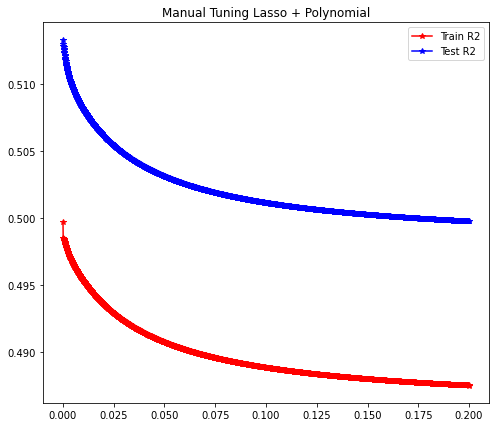

In [70]:
plt.figure(figsize=(8,7))
plt.plot(Alpha,train_ridge,'r*-')
plt.plot(Alpha,test_ridge,'b*-')
plt.legend(['Train R2','Test R2'])
plt.title('Manual Tuning Lasso + Polynomial')
plt.show()

In [71]:
train_lasso, test_lasso = Manual_Tune(Alpha, x_train_1, x_test_1,y_train_1,y_test_1, Lasso)

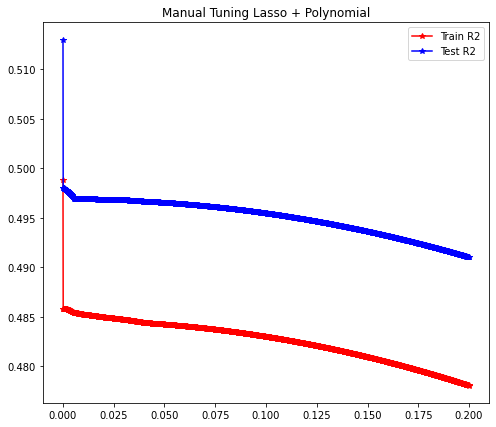

In [72]:
plt.figure(figsize=(8,7))
plt.plot(Alpha,train_lasso,'r*-')
plt.plot(Alpha,test_lasso,'b*-')
plt.legend(['Train R2','Test R2'])
plt.title('Manual Tuning Lasso + Polynomial')
plt.show()

In [73]:
beta=np.arange(0,5,0.001)

In [74]:
train_Enet, test_Enet = Manual_Tune(beta, x_train_1, x_test_1,y_train_1,y_test_1, ElasticNet)

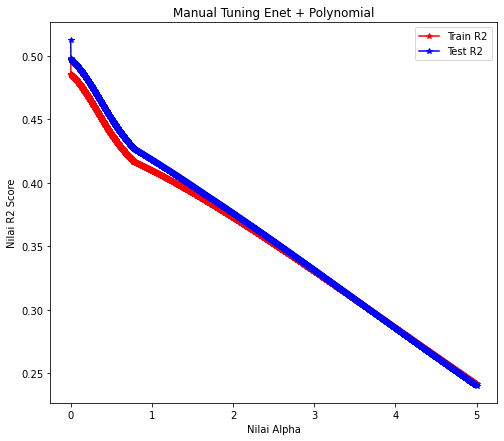

In [75]:
plt.figure(figsize=(8,7))
plt.plot(beta,train_Enet,'r*-')
plt.plot(beta,test_Enet,'b*-')
plt.legend(['Train R2','Test R2'])
plt.title('Manual Tuning Enet + Polynomial')
plt.xlabel('Nilai Alpha')
plt.ylabel('Nilai R2 Score')
plt.show()

In [76]:
### Analisa Error

In [77]:
df_Error_T=x_train_1.copy()

In [78]:
df_Error_T.head()

,month,day,hour,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,18
2760,11,5,0,1.486464,0.398102,1.339484e-13,1.621540,1.361174,1.290893,-0.173363,...,1.650726,1.836283,1.326778,0.219215,1.008321,1.284311,-0.165234,0.585840,0.397484,4.403145e-13
13436,1,8,11,-0.541042,1.402966,1.990075e-13,-0.600677,0.836347,-0.510453,0.742482,...,-0.623728,0.266931,-0.511496,0.451858,0.702968,-0.510080,0.060335,1.399278,0.931242,4.438672e-13
5746,10,2,10,-0.541042,-0.510040,-6.183942e-14,-0.600677,-0.689840,-0.513370,-0.442731,...,-0.623728,-0.724143,-0.513158,-0.495711,-0.380397,-0.515713,-0.195099,-0.564949,-0.170137,4.298784e-13
5998,12,21,22,-0.541042,1.104164,1.339484e-13,-0.600677,0.576665,-0.511182,0.353108,...,-0.623728,0.076120,-0.511911,0.142354,0.554207,-0.511488,-0.055877,1.200967,0.769368,4.403145e-13
6896,9,3,17,2.048708,-0.420993,1.339484e-13,1.850170,1.305313,2.646804,-0.428121,...,1.821082,2.155690,2.487433,-0.182675,0.974306,2.703028,-0.194136,-0.441866,-0.102070,4.403145e-13


In [79]:
df_Error_T['target']=y_train_1

In [80]:
df_Error_T.head()

,month,day,hour,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,target
2760,11,5,0,1.486464,0.398102,1.339484e-13,1.621540,1.361174,1.290893,-0.173363,...,1.836283,1.326778,0.219215,1.008321,1.284311,-0.165234,0.585840,0.397484,4.403145e-13,11.50
13436,1,8,11,-0.541042,1.402966,1.990075e-13,-0.600677,0.836347,-0.510453,0.742482,...,0.266931,-0.511496,0.451858,0.702968,-0.510080,0.060335,1.399278,0.931242,4.438672e-13,30.33
5746,10,2,10,-0.541042,-0.510040,-6.183942e-14,-0.600677,-0.689840,-0.513370,-0.442731,...,-0.724143,-0.513158,-0.495711,-0.380397,-0.515713,-0.195099,-0.564949,-0.170137,4.298784e-13,4.90
5998,12,21,22,-0.541042,1.104164,1.339484e-13,-0.600677,0.576665,-0.511182,0.353108,...,0.076120,-0.511911,0.142354,0.554207,-0.511488,-0.055877,1.200967,0.769368,4.403145e-13,16.00
6896,9,3,17,2.048708,-0.420993,1.339484e-13,1.850170,1.305313,2.646804,-0.428121,...,2.155690,2.487433,-0.182675,0.974306,2.703028,-0.194136,-0.441866,-0.102070,4.403145e-13,7.00


In [81]:
best_a=Alpha[np.argmax('test_ridge')]

In [82]:
Model_R=Ridge(alpha=best_a)

In [83]:
Model_R.fit(x_train_1,y_train_1)

Ridge(alpha=0.0)

In [84]:
pred_train=Model_R.predict(x_train_1)

In [85]:
df_Error_T['prediksi']=pred_train

In [86]:
df_Error_T['Error']=abs(df_Error_T['target']- df_Error_T['prediksi'])

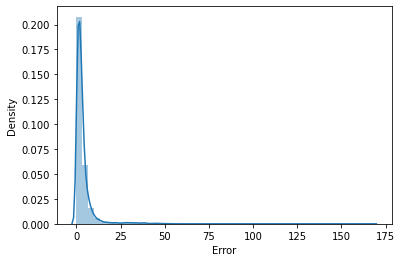

In [87]:
sns.distplot(df_Error_T['Error'])
plt.show()

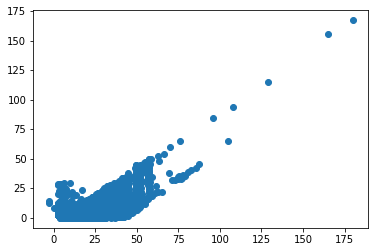

In [88]:
plt.scatter(df_Error_T['target'],df_Error_T['Error'])
plt.show()